# 歡迎使用 Colab！

In [3]:
from google.colab import files
uploaded = files.upload()

# 匯入套件
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# 讀取資料（確認檔名一致）
df = pd.read_csv("Student_performance_data _.csv")

# 選擇輸入特徵與目標
selected_features = ["Absences", "ParentalSupport", "StudyTimeWeekly"]
target_col = "GPA"

# 取出 X, y
X = df[selected_features].copy()
y = df[target_col]

# ===== 1) 前處理：去除欄位/資料可能的前後空格 =====
X.columns = X.columns.str.strip()

# 若 ParentalSupport 是字串，先去空格
if X["ParentalSupport"].dtype == "object":
    X["ParentalSupport"] = X["ParentalSupport"].astype(str).str.strip()

# ===== 2) 缺失值處理 =====
# 數值欄位用中位數補
for col in ["Absences", "StudyTimeWeekly"]:
    X[col] = pd.to_numeric(X[col], errors="coerce")
    X[col] = X[col].fillna(X[col].median())

# 類別欄位用眾數補
X["ParentalSupport"] = X["ParentalSupport"].fillna(
    X["ParentalSupport"].mode()[0]
)

# 目標值若有缺失，丟掉對應列
mask = y.notna()
X = X[mask]
y = y[mask]

# 分割訓練 / 測試資料（8:2）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== 4) 建立並訓練 Linear Regression 模型 =====
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 預測與評估
y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("=== Linear Regression (Absences, ParentalSupport, StudyTimeWeekly → GPA) ===")
print(f"使用特徵：{selected_features}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")

# 顯示部分預測結果
result = pd.DataFrame({
    "Actual_GPA": y_test.values[:20],
    "Predicted_GPA": y_pred[:20]
})
print("\n--- Sample Predictions ---")
print(result)

# （加分）顯示回歸係數，方便解釋模型
coef_df = pd.DataFrame({
    "Feature": selected_features,
    "Coefficient": lr_model.coef_
})
print("\n--- Linear Regression Coefficients ---")
print(coef_df)

print("\nIntercept:", lr_model.intercept_)

# （可選）ParentalSupport 編碼對照
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\n--- ParentalSupport Encoding Map ---")
print(mapping)


Saving Student_performance_data _.csv to Student_performance_data _ (1).csv
=== Linear Regression (Absences, ParentalSupport, StudyTimeWeekly → GPA) ===
使用特徵：['Absences', 'ParentalSupport', 'StudyTimeWeekly']
R² Score: 0.918
Mean Absolute Error (MAE): 0.204

--- Sample Predictions ---
    Actual_GPA  Predicted_GPA
0     1.427724       1.356455
1     3.117354       2.951743
2     2.037769       2.016582
3     3.548521       3.575501
4     0.248977       0.316263
5     2.627694       2.754950
6     2.057379       1.483910
7     2.248338       1.778472
8     2.194707       2.113857
9     0.758183       1.108797
10    2.370893       2.375893
11    0.766405       0.669835
12    2.952722       2.964164
13    2.343331       2.794733
14    2.771811       2.649797
15    0.287867       0.360937
16    1.018265       1.319547
17    1.629356       1.388930
18    2.074439       1.703408
19    2.423801       2.314125

--- Linear Regression Coefficients ---
           Feature  Coefficient
0         Ab

Saving Student_performance_data _.csv to Student_performance_data _ (1).csv


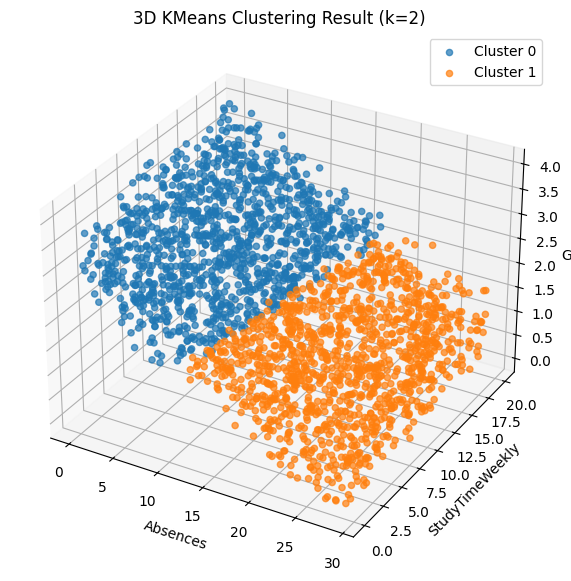

In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # 3D 繪圖

# 讀取資料
df = pd.read_csv("Student_performance_data _.csv")

# 選特徵（非監督式分群）
features = ["Absences", "StudyTimeWeekly", "GPA"]
X = df[features]

# 標準化（KMeans 一定要）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans 分兩群
kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ====== 3D Scatter Plot ======
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

for c in sorted(df["Cluster"].unique()):
    subset = df[df["Cluster"] == c]
    ax.scatter(
        subset["Absences"],
        subset["StudyTimeWeekly"],
        subset["GPA"],
        label=f"Cluster {c}",
        alpha=0.7
    )

ax.set_xlabel("Absences")
ax.set_ylabel("StudyTimeWeekly")
ax.set_zlabel("GPA")
ax.set_title("3D KMeans Clustering Result (k=2)")
ax.legend()

plt.show()


Saving Student_performance_data _.csv to Student_performance_data _ (2).csv


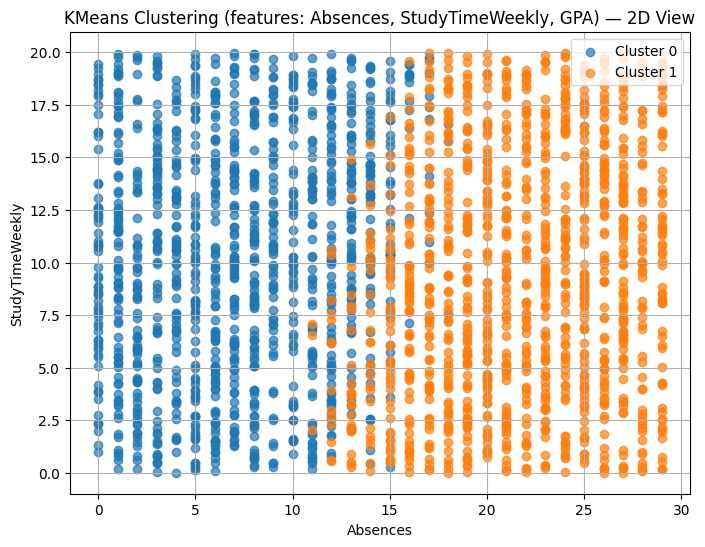

In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 讀取資料
df = pd.read_csv("Student_performance_data _.csv")

# ✅ 分群用 3 個特徵
cluster_features = ["Absences", "StudyTimeWeekly", "GPA"]
X_cluster = df[cluster_features]

# 標準化（KMeans 一定要）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# KMeans 分兩群
kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ✅ 畫圖只顯示 2 維：Absences vs StudyTimeWeekly
plt.figure(figsize=(8, 6))
for c in sorted(df["Cluster"].unique()):
    subset = df[df["Cluster"] == c]
    plt.scatter(
        subset["Absences"],
        subset["StudyTimeWeekly"],
        label=f"Cluster {c}",
        alpha=0.7
    )

plt.xlabel("Absences")
plt.ylabel("StudyTimeWeekly")
plt.title("KMeans Clustering (features: Absences, StudyTimeWeekly, GPA) — 2D View")
plt.grid(True)
plt.legend()
plt.show()


Saving Student_performance_data _.csv to Student_performance_data _ (3).csv


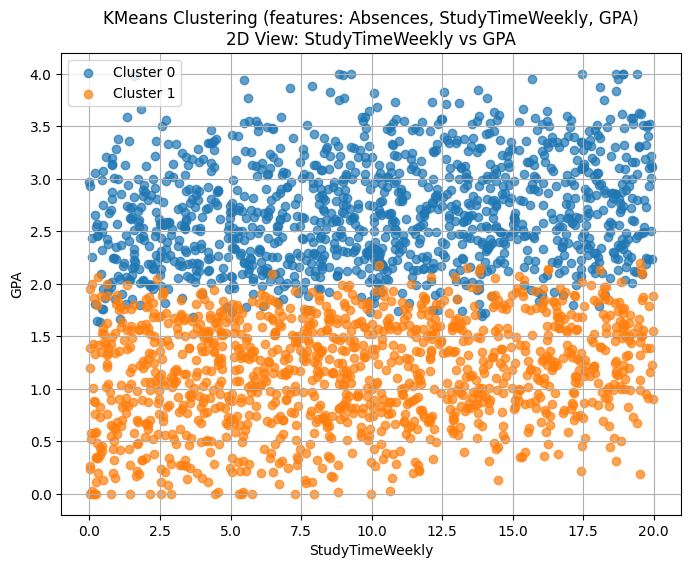

In [4]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 讀取資料
df = pd.read_csv("Student_performance_data _.csv")

# ===== 分群用 3 個特徵 =====
cluster_features = ["Absences", "StudyTimeWeekly", "GPA"]
X_cluster = df[cluster_features]

# 標準化（KMeans 一定要）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# KMeans 分兩群
kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ===== 2D Scatter：StudyTimeWeekly × GPA =====
plt.figure(figsize=(8, 6))

for c in sorted(df["Cluster"].unique()):
    subset = df[df["Cluster"] == c]
    plt.scatter(
        subset["StudyTimeWeekly"],
        subset["GPA"],
        label=f"Cluster {c}",
        alpha=0.7
    )

plt.xlabel("StudyTimeWeekly")
plt.ylabel("GPA")
plt.title("KMeans Clustering (features: Absences, StudyTimeWeekly, GPA)\n2D View: StudyTimeWeekly vs GPA")
plt.grid(True)
plt.legend()
plt.show()


Saving Student_performance_data _.csv to Student_performance_data _ (7).csv


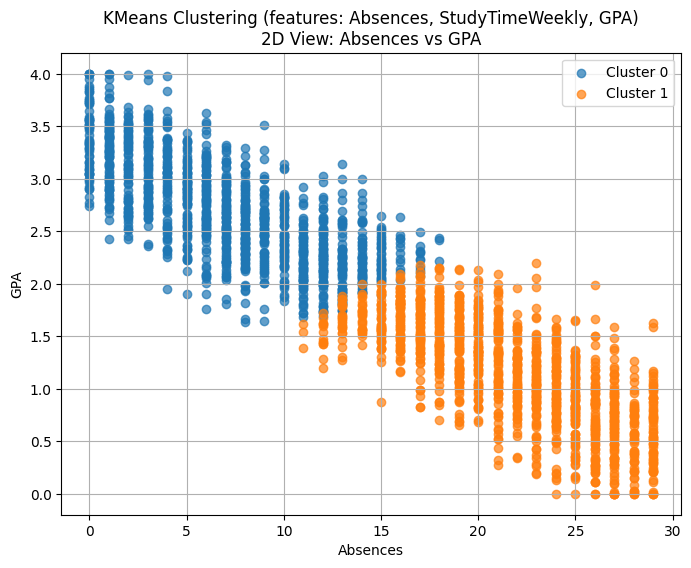

=== 各群在不同變量上的範圍 (min ~ max) ===
         Absences_min  Absences_max  StudyTimeWeekly_min  StudyTimeWeekly_max  \
Cluster                                                                         
0                   0            18             0.001057            19.948459   
1                  11            29             0.004859            19.978094   

          GPA_min   GPA_max  
Cluster                      
0        1.633812  4.000000  
1        0.000000  2.196217  


In [8]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 讀取資料
df = pd.read_csv("Student_performance_data _.csv")

# ===== 分群用 3 個特徵 =====
cluster_features = ["Absences", "StudyTimeWeekly", "GPA"]
X_cluster = df[cluster_features]

# 標準化（KMeans 一定要）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# KMeans 分兩群
kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ===== 2D Scatter：Absences × GPA =====
plt.figure(figsize=(8, 6))

for c in sorted(df["Cluster"].unique()):
    subset = df[df["Cluster"] == c]
    plt.scatter(
        subset["Absences"],
        subset["GPA"],
        label=f"Cluster {c}",
        alpha=0.7
    )

plt.xlabel("Absences")
plt.ylabel("GPA")
plt.title(
    "KMeans Clustering (features: Absences, StudyTimeWeekly, GPA)\n"
    "2D View: Absences vs GPA"
)
plt.grid(True)
plt.legend()
plt.show()



# 原本的 range_table 假設長這樣：
# range_table = df.groupby("Cluster")[variables].agg(["min", "max"])

# 攤平欄位名稱
range_table_clean = range_table.copy()
range_table_clean.columns = [
    f"{var}_{stat}" for var, stat in range_table_clean.columns
]

print("=== 各群在不同變量上的範圍 (min ~ max) ===")
print(range_table_clean)


Saving Student_performance_data _.csv to Student_performance_data _ (8).csv


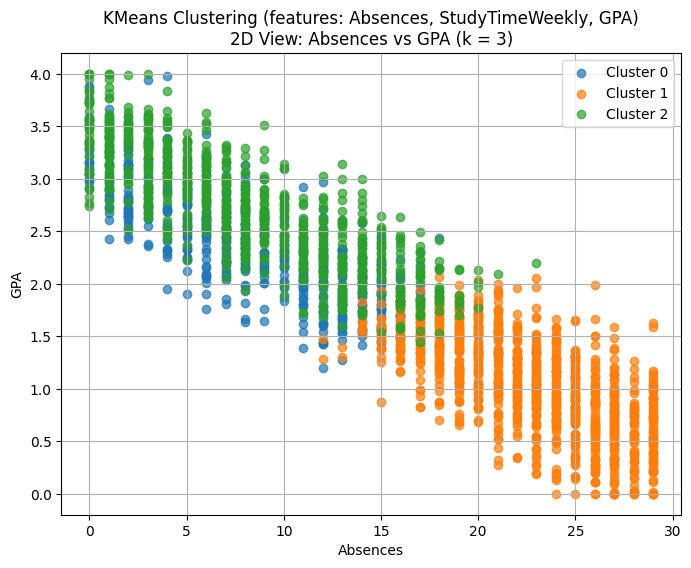

=== 各群在不同變量上的範圍 (min ~ max, k = 3) ===
         Absences_min  Absences_max  StudyTimeWeekly_min  StudyTimeWeekly_max  \
Cluster                                                                         
0                   0            19                0.001               10.943   
1                  12            29                0.005               19.968   
2                   0            23                8.511               19.978   

         GPA_min  GPA_max  
Cluster                    
0          1.198    3.979  
1          0.000    2.068  
2          1.442    4.000  


In [9]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 讀取資料
df = pd.read_csv("Student_performance_data _.csv")

# ===== 分群用 3 個特徵 =====
cluster_features = ["Absences", "StudyTimeWeekly", "GPA"]
X_cluster = df[cluster_features]

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# ⭐⭐ 改成「3 群」
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ===== 2D Scatter：Absences × GPA =====
plt.figure(figsize=(8, 6))

for c in sorted(df["Cluster"].unique()):
    subset = df[df["Cluster"] == c]
    plt.scatter(
        subset["Absences"],
        subset["GPA"],
        label=f"Cluster {c}",
        alpha=0.7
    )

plt.xlabel("Absences")
plt.ylabel("GPA")
plt.title(
    "KMeans Clustering (features: Absences, StudyTimeWeekly, GPA)\n"
    "2D View: Absences vs GPA (k = 3)"
)
plt.grid(True)
plt.legend()
plt.show()

# ===== 各群範圍 (min ~ max) =====
variables = ["Absences", "StudyTimeWeekly", "GPA"]

range_table = (
    df.groupby("Cluster")[variables]
      .agg(["min", "max"])
)

# 攤平欄位名稱
range_table_clean = range_table.copy()
range_table_clean.columns = [
    f"{var}_{stat}" for var, stat in range_table_clean.columns
]

print("=== 各群在不同變量上的範圍 (min ~ max, k = 3) ===")
print(range_table_clean.round(3))
